**Importing Data**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')

**Data Exploration**

In [8]:
df.head()

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.258235,79.665185,...,2.743879,0.906809,1.089243,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.876546,59.611505,...,2.587700,0.843739,0.879911,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.070623,70.577443,...,2.426294,0.850923,1.003442,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.909312,82.924450,...,3.558240,0.946786,1.814810,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.562294,95.352336,...,3.896884,0.988036,1.157241,1,1,0,0,0,3,4


**Some info from the data description from Kaggle**

SES_Quartile	Socioeconomic status quartile (1 = lowest, 4 = highest).

ParentalEducation	Highest education of parent/guardian (<HS, HS, SomeCollege, Bachelors+).

SchoolType	Type of school attended (Public, Private).

Locale	School location (Suburban, City, Rural, Town).

TestScore_Math	Math achievement score (0–100).

TestScore_Reading	Reading achievement score (0–100).

TestScore_Science	Science achievement score (0–100).

GPA	Cumulative Grade Point Average on a 0.0–4.0 scale.

AttendanceRate	Fraction of school days attended (0.70–1.00).

StudyHours	Average self-reported homework/study hours per day (0–4).

InternetAccess	Home internet access (1 = yes, 0 = no).

Extracurricular	Participation in clubs/sports (1 = yes, 0 = no).

PartTimeJob	Holds a part-time job (1 = yes, 0 = no).

ParentSupport	Regular parental help with homework (1 = yes, 0 = no).

Romantic	Currently in a romantic relationship (1 = yes, 0 = no).

FreeTime	Amount of free time after school on a scale from 1 (low) to 5 (high).

GoOut	Frequency of going out with friends on a scale from 1 (low) to 5 (high).

**Checking columns and rows**


In [11]:
print(df.shape)

(8000774, 21)


**Checking for Missing Data**

In [13]:
missing_data=df.isnull().sum()
print("Missing Data: \n", missing_data)

Missing Data: 
 Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64


**Checking for duplicates**

In [15]:
duplicates = df.duplicated()
print(duplicates)


0          False
1          False
2          False
3          False
4          False
           ...  
8000769    False
8000770    False
8000771    False
8000772    False
8000773    False
Length: 8000774, dtype: bool


In [23]:
data_types=df.dtypes
print(data_types)

Age                    int64
Grade                  int64
Gender                object
Race                  object
SES_Quartile           int64
ParentalEducation     object
SchoolType            object
Locale                object
TestScore_Math       float64
TestScore_Reading    float64
TestScore_Science    float64
GPA                  float64
AttendanceRate       float64
StudyHours           float64
InternetAccess         int64
Extracurricular        int64
PartTimeJob            int64
ParentSupport          int64
Romantic               int64
FreeTime               int64
GoOut                  int64
dtype: object


**Categorical and Numerical Data**

In [16]:
num_cols = df.select_dtypes(include=np.number).columns
obj_cols = df.select_dtypes(include='object').columns

print(f'numeric columns: {num_cols} \n')
print(f'objective columns: {obj_cols} \n')

numeric columns: Index(['Age', 'Grade', 'SES_Quartile', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut'],
      dtype='object') 

objective columns: Index(['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale'], dtype='object') 



**Checking Range of Columns**

In [29]:
stats = df.describe()
print(stats.loc[['min', 'max']])

      Age  Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
min  14.0    9.0           1.0       22.576813          21.187972   
max  18.0   12.0           4.0      100.000000         100.000000   

     TestScore_Science       GPA  AttendanceRate  StudyHours  InternetAccess  \
min          19.188829  0.713181             0.7    0.000000             0.0   
max         100.000000  4.000000             1.0    2.793829             1.0   

     Extracurricular  PartTimeJob  ParentSupport  Romantic  FreeTime  GoOut  
min              0.0          0.0            0.0       0.0       1.0    1.0  
max              1.0          1.0            1.0       1.0       5.0    5.0  


In [35]:
df[obj_cols].apply(pd.Series.value_counts)

,Gender,Race,ParentalEducation,SchoolType,Locale
<HS,NaN,NaN,1498523.0,NaN,NaN
Asian,NaN,400754.0,NaN,NaN,NaN
Bachelors+,NaN,NaN,1500310.0,NaN,NaN
Black,NaN,1200976.0,NaN,NaN,NaN
City,NaN,NaN,NaN,NaN,2479888.0
Female,4080208.0,NaN,NaN,NaN,NaN
HS,NaN,NaN,2601118.0,NaN,NaN
Hispanic,NaN,2319159.0,NaN,NaN,NaN
Male,3920566.0,NaN,NaN,NaN,NaN
Other,NaN,159372.0,NaN,NaN,NaN


**Checking for Outliers**

In [52]:
print(df.describe())

                Age         Grade  SES_Quartile  TestScore_Math  \
count  8.000774e+06  8.000774e+06  8.000774e+06    8.000774e+06   
mean   1.599959e+01  1.079974e+01  2.499802e+00    7.497554e+01   
std    1.413915e+00  1.165974e+00  1.118161e+00    9.944944e+00   
min    1.400000e+01  9.000000e+00  1.000000e+00    2.257681e+01   
25%    1.500000e+01  1.000000e+01  1.000000e+00    6.824699e+01   
50%    1.600000e+01  1.100000e+01  3.000000e+00    7.499531e+01   
75%    1.700000e+01  1.200000e+01  3.000000e+00    8.174198e+01   
max    1.800000e+01  1.200000e+01  4.000000e+00    1.000000e+02   

       TestScore_Reading  TestScore_Science           GPA  AttendanceRate  \
count       8.000774e+06       8.000774e+06  8.000774e+06    8.000774e+06   
mean        7.497894e+01       7.497851e+01  2.996743e+00    8.995891e-01   
std         9.943306e+00       9.948554e+00  4.595127e-01    4.806154e-02   
min         2.118797e+01       1.918883e+01  7.131814e-01    7.000000e-01   
25%        

In [49]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)
print(df[outliers.any(axis=1)])

         Age  Grade  Gender      Race  SES_Quartile ParentalEducation  \
29        17     12  Female     White             4        Bachelors+   
93        15     10  Female  Hispanic             2       SomeCollege   
124       16     11    Male     White             3                HS   
157       18     12  Female  Hispanic             3       SomeCollege   
162       15     10  Female  Hispanic             3                HS   
...      ...    ...     ...       ...           ...               ...   
8000503   16     11  Female  Hispanic             1                HS   
8000511   16     11    Male     Other             3               <HS   
8000633   17     12  Female     White             4       SomeCollege   
8000703   17     12  Female     White             3       SomeCollege   
8000750   16     11  Female     White             3       SomeCollege   

        SchoolType    Locale  TestScore_Math  TestScore_Reading  ...  \
29          Public     Rural       53.124219       

**Data Visualization**

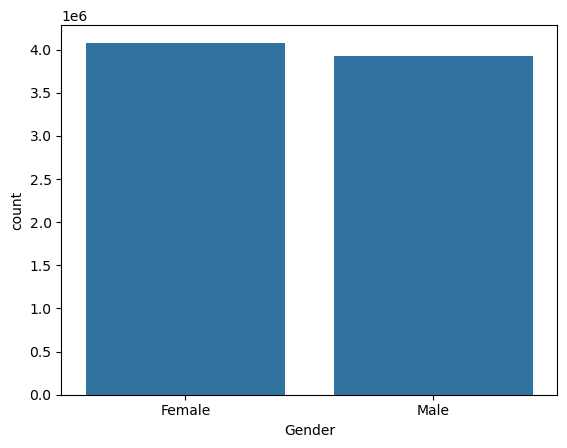

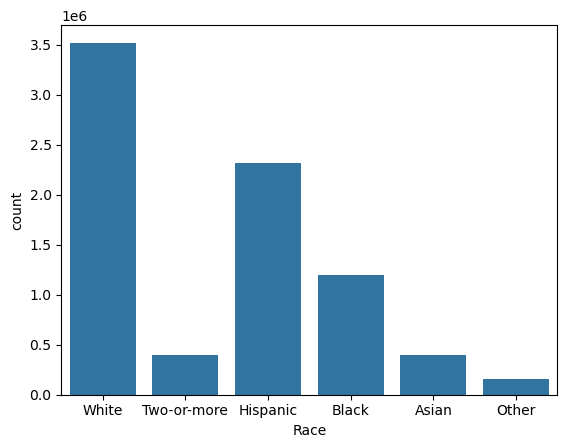

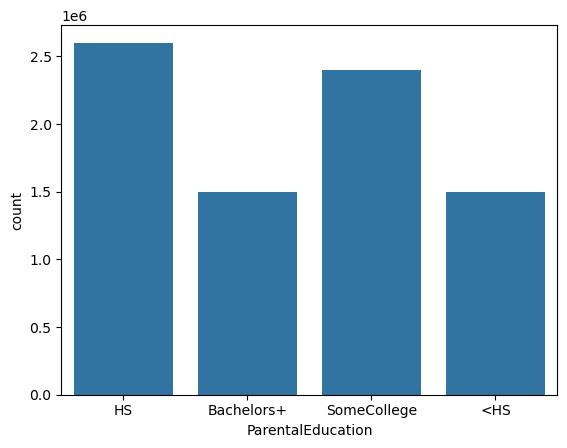

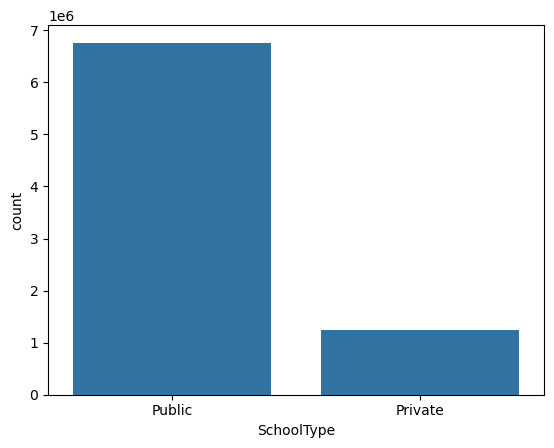

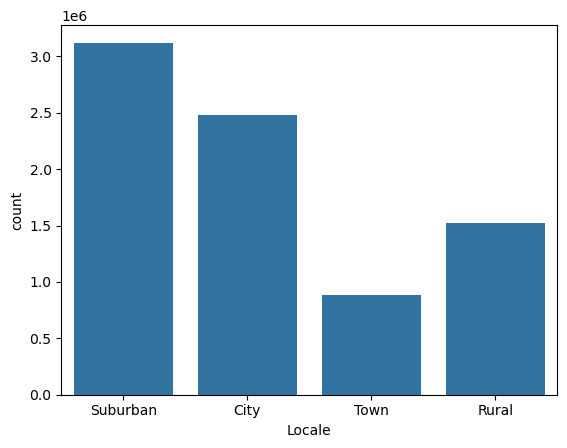

In [40]:
for col in obj_cols:
    sns.countplot(x=col, data=df)
    plt.show()

Boxplot to check for outliers

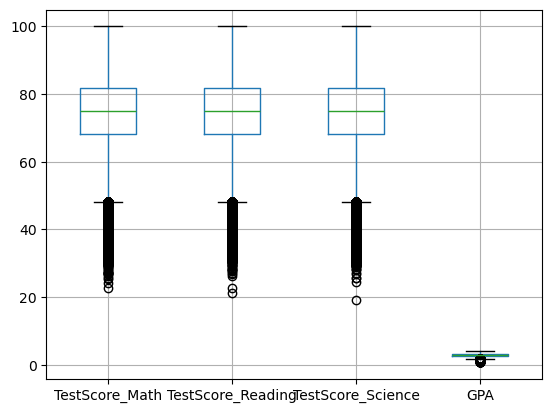

In [54]:
df.boxplot(column=['TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'GPA'])
plt.show()

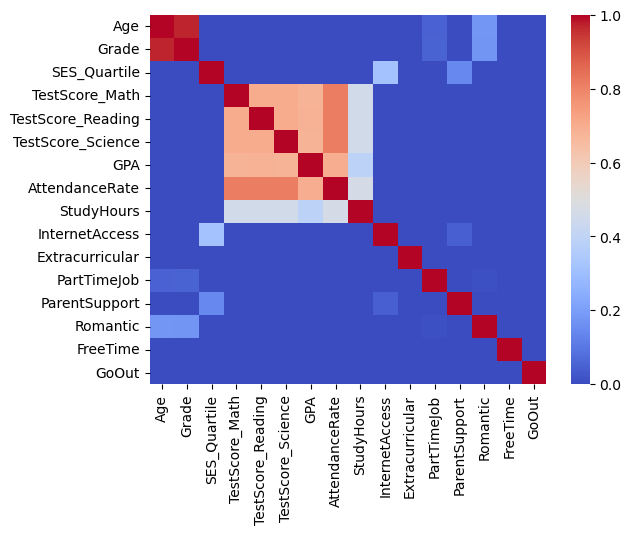

In [61]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.show()

**Use one-hot encoding**

In [18]:
df_encoded = pd.get_dummies(df, columns=obj_cols, drop_first=True)

In [20]:
#check results of one-hot encoding
print(df_encoded.head())

   Age  Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
0   17     12             3       70.258235          79.665185   
1   18     12             2       67.876546          59.611505   
2   16     11             2       62.070623          70.577443   
3   14      9             4       79.909312          82.924450   
4   16     11             4       90.562294          95.352336   

   TestScore_Science       GPA  AttendanceRate  StudyHours  InternetAccess  \
0          80.824230  2.743879        0.906809    1.089243               1   
1          70.920341  2.587700        0.843739    0.879911               1   
2          60.624018  2.426294        0.850923    1.003442               1   
3          85.585315  3.558240        0.946786    1.814810               1   
4          88.928161  3.896884        0.988036    1.157241               1   

   ...  Race_Other  Race_Two-or-more  Race_White  \
0  ...       False             False        True   
1  ...       False            

In [22]:
#fixing whatever happened before
#converting boolean to integers
# One-hot encode
df_encoded = pd.get_dummies(df, columns=obj_cols, drop_first=True)

In [24]:
# Convert all boolean columns to integers (0/1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

In [26]:
# Now check the result
print(df_encoded.head())

   Age  Grade  SES_Quartile  TestScore_Math  TestScore_Reading  \
0   17     12             3       70.258235          79.665185   
1   18     12             2       67.876546          59.611505   
2   16     11             2       62.070623          70.577443   
3   14      9             4       79.909312          82.924450   
4   16     11             4       90.562294          95.352336   

   TestScore_Science       GPA  AttendanceRate  StudyHours  InternetAccess  \
0          80.824230  2.743879        0.906809    1.089243               1   
1          70.920341  2.587700        0.843739    0.879911               1   
2          60.624018  2.426294        0.850923    1.003442               1   
3          85.585315  3.558240        0.946786    1.814810               1   
4          88.928161  3.896884        0.988036    1.157241               1   

   ...  Race_Other  Race_Two-or-more  Race_White  \
0  ...           0                 0           1   
1  ...           0            

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

**Creating target variable**

In [29]:
df['AcademicSuccess'] = df[['TestScore_Math', 'TestScore_Reading', 'TestScore_Science']].mean(axis=1)

**Prepare features**

In [32]:
X = df.drop(columns=['TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'AcademicSuccess'])
y = df['AcademicSuccess']

In [36]:
num_cols = X.select_dtypes(include=np.number).columns

In [38]:
#standardizing numeric features

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [45]:
#encoding
obj_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

**Model Time**

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing, 80% for training (common choice)
    random_state=42,      # ensures reproducibility
    shuffle=True          # shuffles data before splitting (default)
)

In [49]:
#training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
#making predictions
y_pred = model.predict(X_test)

**Evaluating Model Performance**

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R^2 Score: 0.869
RMSE: 3.219
